<a href="https://colab.research.google.com/github/sssouto/caminho-da-escola/blob/main/TrabalhoFinal_SanderSoaresSouto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final - Ciência de Dados - Enap / 2021
### Aluno: Sander Soares Souto

### Apresentação do Dataset

O nome do dataset é "Aquisição de Ônibus Escolares do Programa Caminho da Escola - 2016/2020". Este dataset contém dados referentes à compra de veículos para o transporte escolar por parte dos Estados, do DF e dos Municípios entre os anos de 2016 e 2020, decorrentes dos pregões eletrônicos FNDE n.º 41, 42 e 43/2015; 18 e 19/2017 e 11/2019.

* Sobre o Programa Caminho da Escola:

O Caminho da Escola é um programa gerido pelo Fundo Nacional de Desenvolvimento da Educação - FNDE com o objetivo de "renovar, padronizar e ampliar a frota de veículos escolares das redes municipal, do DF e estadual de educação básica pública. Voltado a estudantes residentes, prioritariamente, em áreas rurais e ribeirinhas, o programa oferece ônibus, lanchas e bicicletas fabricados especialmente para o tráfego nestas regiões, sempre visando à segurança e à qualidade do transporte. [1](https://www.fnde.gov.br/programas/caminho-da-escola)". Esse programa é executado por meio do Registro de Preços Nacional - RPN.

* Sobre o Registro de Preços Nacional - RPN:

O RPN é uma estratégia de compra nacional compartilhada empreendida pelo FNDE em parceria com os entes federados. Nesse processo, o FNDE se encarrega da elaboração das especificações técnicas padronizadas dos diferentes produtos, dos estudos de mercado, da realização do pregão eletrônico, do controle de qualidade e da gestão das atas de registro de preços firmadas com os fornecedores adjudicatários. Os Estados, o DF e Municípios, por sua vez, contratam os produtos e pagam diretamente aos respectivos fornecedores, valendo-se de recursos próprios e/ou de valores transferidos pelo FNDE para essa finalidade (transferências voluntárias). Parte desse processo é gerido por intermédio do Sistema de Gerenciamento de Atas de Registro de Preços - SIGARP [2](https://www.fnde.gov.br/sigarpweb/index/consultapublica), sob a responsabilidade do FNDE.

### Link para Download do Dataset:  

#### Base de dados do SIGARP: 
*   no Drive: https://drive.google.com/file/d/1z0sY7iWeU63ftDmXWvoHSaWMo0Jzz6_u/view?usp=sharing
*   no Github: https://github.com/sssouto/caminho-da-escola/blob/main/sigarp_fnde_pregoes_onibus_%2B2015.xlsx
*   Fonte: Sistema de Gerenciamento de Atas de Registro de Preços - SIGARP: https://www.fnde.gov.br/sigarpweb/index.php/relatorio/relatorio-pregao2/list

#### Base de dados do PIB: 
*   no Drive: https://drive.google.com/file/d/10tJW0Ks-_m153c7GtFxmX9E9-rPmnADU/view?usp=sharing
*   no Github: https://github.com/sssouto/caminho-da-escola/blob/main/PIB%20dos%20Munic%C3%ADpios%20-%20base%20de%20dados%202012-2018.xls
*   Fonte: Instituto Brasileiro de Geografia e Estatística - IBGE: https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?=&t=resultados&utm_source=landing&utm_medium=explica&utm_campaign=pib

Obs: os dados relativos ao mercado de ônibus no Brasil foram obtidos no site da Federação Nacional da Distribuição de Veículos Automotores - FENABRAVE: http://www.fenabrave.org.br/Portal/conteudo/conteudo/anuarios. Os dados não estavam disponíveis em base de dados, e sim em arquivos PDF. Assim, os dados foram coletados pelo autor deste estudo e inseridos nos referidos dataframes nas células correspondentes deste documento.

### Motivação Pessoal:

Minha motivação pessoal para a escolha desse dataset reside no fato de que, desde o ano de 2012, tenho trabalhado na área de compras do FNDE, sendo que, entre 2015 e 2019, fui um dos coordenadores do RPN, período durante o qual fui o gestor do SIGARP. Assim, pela familiaridade com o assunto, achei oportuno explorar alguns dados das compras nacionais para a educação sob a gestão do FNDE. Dentre os diversos produtos do portfólio do RPN, escolhi os ônibus escolares do Programa Caminho da Escola porque esse foi o primeiro objeto executado pelo FNDE a partir dessa estratégia de compra compartilhada, assim como é o objeto com o maior volume de aquisições ao longo dos anos. Além disso, possuo interesse pessoal em dados relativos ao mercado de ônibus, considerando meu hobby de "busólogo".

### Investigação

A investigação realizada neste estudo objetivou averiguar das seguintes hipóteses:

* Hipótese 1: existe uma maior tendência de aquisição de ônibus escolares com recursos transferidos pelo FNDE que com recursos próprios dos entes federados.

* Hipótese 2: os estados (UF) que mais adquirem ônibus escolares também são os que mais utilizam recursos próprios como forma de pagamento dos veículos, e os estados (UF) que mais adquirem ônibus escolares com recursos próprios também são os que têm maior Produto Interno Bruto - PIB.

* Hipótese 3: as vendas de ônibus escolares para o Programa Caminho da Escola representam fatia consistente e significativa do mercado de ônibus no período investigado.

* Hipótese 4: a participação das empresas fornecedoras no mercado de ônibus no Brasil se reflete nas vendas para o Programa Caminho da Escola.

A investigação será realizada a partir dos dados de contratação de ônibus escolares pelos entes federados em decorrência da utilização das atas de registro de preços do FNDE, conforme dados do SIGARP.

In [20]:
# Importando as bibliotecas:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import heapq

In [5]:
# Fazendo a integração com o Drive, para leitura dos arquivos que servirão de base para montar os datasets:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importando o dataset SIGARP:

path = '/content/drive/MyDrive/Programação/data/sigarp_fnde_pregoes_onibus_+2015.xlsx'
df_sigarp = pd.read_excel(path)

In [7]:
# Mostrando as primeiras linhas do dataset SIGARP:
df_sigarp.head()

,Nº da Solicitação de Adesão,Enquadramento,Código SIMEC,Número do Processo,Data Solicitação,Data última mov.,Nº do Pregão,Tipo do Pregão,Nº Ata Registro de Preço,Cnpj Entidade,Entidade,UF,Email,Telefone,Tipo de Pagamento,Nº do item no pregão,Item,Vigência do item,Qtde.,Fornecedor,Cnpj Fornecedor,Email Fornecedor,Telefone Fornecedor,Valor unitário,Valor total,Situação da adesão
0,71719,-,NaN,NaN,2016-12-16,2017-03-21,41/2015,Nacional,NaN,10.792.928/0016-96,CAMPUS EIRUNEPE,AM,gab.ceiru@ifam.edu.br,(97)-34811217,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,1,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,186400,CONTRATO FIRMADO
1,71614,-,NaN,NaN,2016-11-22,2016-12-16,41/2015,Nacional,NaN,13.393.152/0001-43,PREF MUN DE FATIMA,BA,prefeitura@fatima.ba.gov.br,(75)-36582336,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,5,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,932000,CONTRATO FIRMADO
2,71774,-,NaN,NaN,2016-12-21,2017-01-05,41/2015,Nacional,NaN,13.810.833/0001-60,PREF MUN DE RUY BARBOSA,BA,gabineteclaudio@gmail.com,(75)-32521043,Transferência Direta,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,1,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,186400,CONTRATO FIRMADO
3,71608,-,NaN,NaN,2016-11-21,2017-02-24,41/2015,Nacional,NaN,13.811.807/0001-56,PREF MUN DE UTINGA,BA,administracao@utinga.ba.gov.br,(75)-33371020,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,10,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,1864000,CONTRATO FIRMADO
4,71296,-,NaN,NaN,2016-08-19,2016-10-06,41/2015,Nacional,NaN,07.616.162/0001-06,PREF MUN DE CAUCAIA,CE,prefeito@caucaia.ce.gov.br,(85)-33424410,Recurso Próprio,2,Ônibus escolar com 02 (duas) áreas reservadas ...,23/12/2015 - 23/12/2016,5,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,932000,CONTRATO FIRMADO


In [8]:
# Preparando o dataset SIGARP:

# Criando a coluna "ano_compra" a partir da data contida na coluna "Data última mov.":
df_sigarp['ano_compra'] = pd.DatetimeIndex(df_sigarp['Data última mov.']).year

# Selecionando apenas os registros relativos aos anos de 2016 e 2020 (excluindo o ano de 2021):
df_sigarp = df_sigarp[df_sigarp['ano_compra'] < 2021]

# Mostrando as primeiras linhas do dataset SIGARP ajustado:
df_sigarp.head()

,Nº da Solicitação de Adesão,Enquadramento,Código SIMEC,Número do Processo,Data Solicitação,Data última mov.,Nº do Pregão,Tipo do Pregão,Nº Ata Registro de Preço,Cnpj Entidade,Entidade,UF,Email,Telefone,Tipo de Pagamento,Nº do item no pregão,Item,Vigência do item,Qtde.,Fornecedor,Cnpj Fornecedor,Email Fornecedor,Telefone Fornecedor,Valor unitário,Valor total,Situação da adesão,ano_compra
0,71719,-,NaN,NaN,2016-12-16,2017-03-21,41/2015,Nacional,NaN,10.792.928/0016-96,CAMPUS EIRUNEPE,AM,gab.ceiru@ifam.edu.br,(97)-34811217,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,1,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,186400,CONTRATO FIRMADO,2017
1,71614,-,NaN,NaN,2016-11-22,2016-12-16,41/2015,Nacional,NaN,13.393.152/0001-43,PREF MUN DE FATIMA,BA,prefeitura@fatima.ba.gov.br,(75)-36582336,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,5,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,932000,CONTRATO FIRMADO,2016
2,71774,-,NaN,NaN,2016-12-21,2017-01-05,41/2015,Nacional,NaN,13.810.833/0001-60,PREF MUN DE RUY BARBOSA,BA,gabineteclaudio@gmail.com,(75)-32521043,Transferência Direta,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,1,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,186400,CONTRATO FIRMADO,2017
3,71608,-,NaN,NaN,2016-11-21,2017-02-24,41/2015,Nacional,NaN,13.811.807/0001-56,PREF MUN DE UTINGA,BA,administracao@utinga.ba.gov.br,(75)-33371020,Recurso Próprio,1,Ônibus escolar com 01 (uma) área reservada (bo...,23/12/2015 - 23/12/2016,10,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,1864000,CONTRATO FIRMADO,2017
4,71296,-,NaN,NaN,2016-08-19,2016-10-06,41/2015,Nacional,NaN,07.616.162/0001-06,PREF MUN DE CAUCAIA,CE,prefeito@caucaia.ce.gov.br,(85)-33424410,Recurso Próprio,2,Ônibus escolar com 02 (duas) áreas reservadas ...,23/12/2015 - 23/12/2016,5,MARCOPOLO SA,88.611.835/0008-03,izaias@taguamotors.com.br,(54)-21014254,186400,932000,CONTRATO FIRMADO,2016


### Hipótese 1: existe uma maior tendência de aquisição de ônibus escolares com recursos transferidos pelo FNDE que com recursos próprios dos entes federados.

In [9]:
# Para realizar essa análise em uma mesma escala, foram consideradas compras com a mesma quantidade de ônibus.

## freq_qtde = df_sigarp['Qtde.'].value_counts()

# Como a maior parte das aquisições é de apenas 1 veículo (4.934 de 6.058 solicitações), filtrou-se o dataframe com essa quantidade:
df_sigarp_ano_valor = df_sigarp[df_sigarp['Qtde.'] == 1]


Text(0.35, 0.001, '* Foram consideradas neste levantamento somente as compras em que foi adquirido apenas 1 veículo')

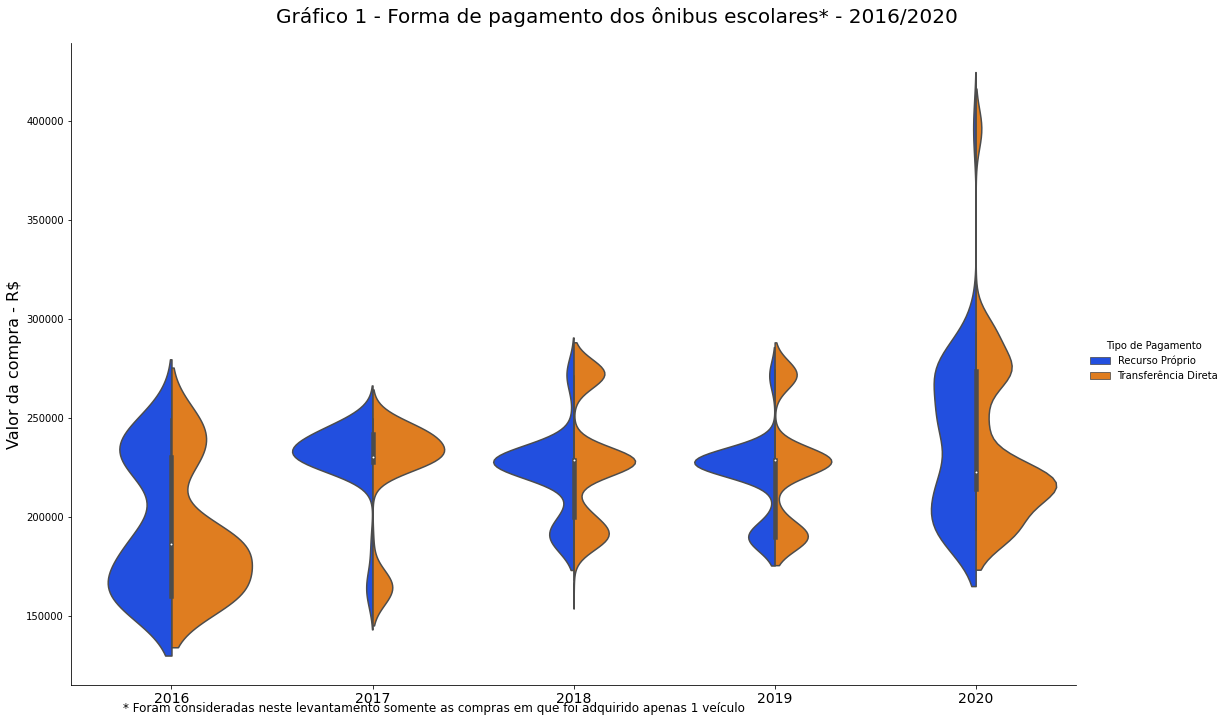

In [10]:
# Plotando um gráfico do tipo 'violino', com o intuito de facilitar a visualização da distribuição dos valores gastos por forma de pagamento, valendo-se da função densidade de probabilidade estimada. No eixo 'x', foram plotados os anos de análise:
g = sns.catplot(x="ano_compra", y="Valor total", hue="Tipo de Pagamento", kind="violin", split=True, data=df_sigarp_ano_valor, palette='bright', height=10, aspect=1.5)
g.set_axis_labels("", "Valor da compra - R$", fontsize=16)
g.set_xticklabels(fontsize=14)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Gráfico 1 - Forma de pagamento dos ônibus escolares* - 2016/2020", fontsize=20)
plt.figtext(0.35, 0.001, "* Foram consideradas neste levantamento somente as compras em que foi adquirido apenas 1 veículo", ha="center", fontsize=12)

### Hipótese 2: os estados (UF) que mais adquirem ônibus escolares também são os que mais utilizam recursos próprios como forma de pagamento dos veículos, e os estados (UF) que mais adquirem ônibus escolares com recursos próprios também são os que têm maior Produto Interno Bruto - PIB.

In [11]:
# 1º: agrupando a coluna "Qtde." do dataframe SIGARP pela coluna "UF", ou seja, identificando a quantidade de veículos adquiridos por UF no período analisado:
df_sigarp_uf_qtde = df_sigarp['Qtde.'].groupby([df_sigarp['UF']]).sum().reset_index(level='UF')

# 2º: ordenando os estados de forma decrescente pela quantidade total de veículos adquiridos:
df_sigarp_uf_qtde = df_sigarp_uf_qtde.sort_values('Qtde.', ascending=False).reset_index()
df_sigarp_uf_qtde

,index,UF,Qtde.
0,25,SP,1985
1,10,MG,1467
2,4,BA,1260
3,8,GO,1140
4,17,PR,796
5,23,SC,671
6,14,PB,669
7,15,PE,654
8,26,TO,640
9,22,RS,542


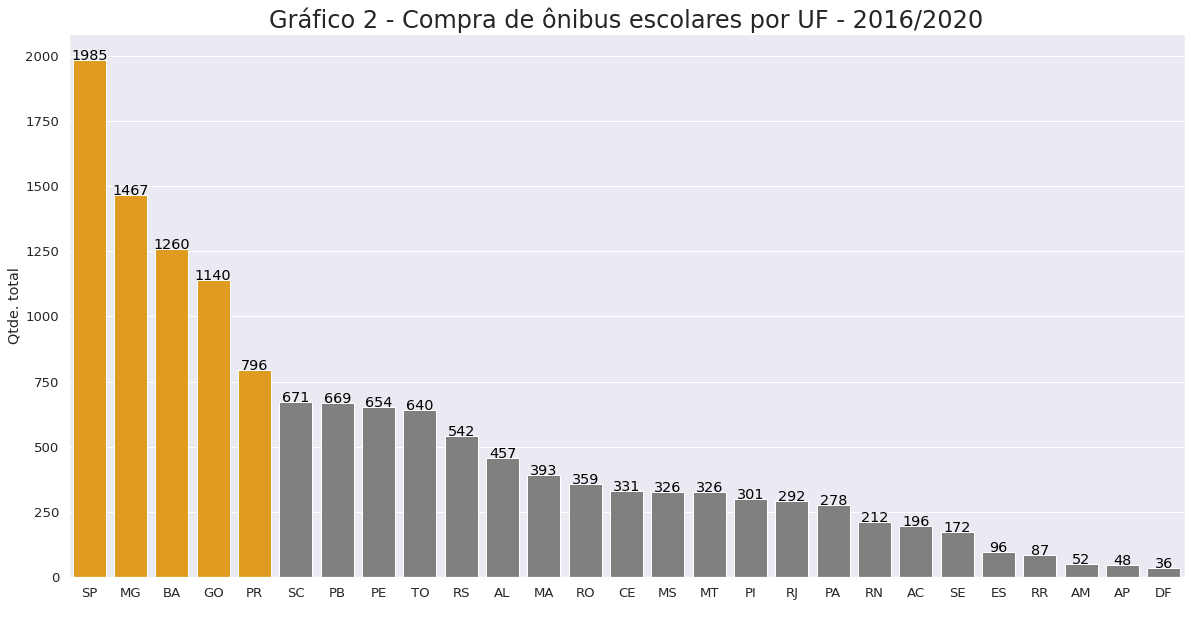

In [12]:
# Plotando um gráfico de barras com destaque para os 5 estados que mais compraram ônibus escolares no período analisado:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
clrs = ['orange' if x in(heapq.nlargest(5, df_sigarp_uf_qtde['Qtde.'])) else 'grey' for x in df_sigarp_uf_qtde['Qtde.']]
g = sns.barplot(x="UF", y="Qtde.", data=df_sigarp_uf_qtde, palette=clrs)
g.set(xlabel=' ', ylabel='Qtde. total')
plt.title('Gráfico 2 - Compra de ônibus escolares por UF - 2016/2020',fontsize=24)
for index, row in df_sigarp_uf_qtde.iterrows():
    g.text(row.name,row['Qtde.'], round(row['Qtde.'],2), color='black', ha="center")

In [13]:
# Para a segunda parte da hipótese, é preciso filtrar o dataframe SIGARP apenas com a forma de pagamento "recursos próprios":
df_sigarp_rec_prop = df_sigarp[df_sigarp['Tipo de Pagamento'] == 'Recurso Próprio']

# Em seguida, é preciso agrupar pela coluna "UF" a coluna "Qtde." do dataframe filtrado apenas com as aquisições com a forma de pagamento "recursos próprios": 
df_sigarp_rec_prop_uf_qtde = df_sigarp_rec_prop['Qtde.'].groupby([df_sigarp_rec_prop['UF']]).sum().reset_index(level='UF')
df_sigarp_rec_prop_uf_qtde = df_sigarp_rec_prop_uf_qtde.sort_values('Qtde.', ascending=False).reset_index()
df_sigarp_rec_prop_uf_qtde

,index,UF,Qtde.
0,23,SP,1042
1,4,BA,590
2,13,PB,393
3,1,AL,391
4,7,GO,262
5,19,RO,234
6,9,MG,229
7,11,MT,221
8,21,SC,202
9,5,CE,160


In [14]:
# Também para a investigação da segunda parte da hipótese 2, é necessário importar o dataset com o PIB dos estados brasileiros:

# Importando o Dataset PIB:
path2 = '/content/drive/MyDrive/Programação/data/PIB dos Municípios - base de dados 2010-2018.xls'
df_pib = pd.read_excel(path2)

In [15]:
# Mostrando as primeiras linhas do dataset PIB:
df_pib.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,69260.391,16118.534,62496.185,93244.656,241119.767,20957.111,262076.878,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,Ariquemes,Polo,1101,Porto Velho,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Subregional B,Centro Subregional,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,73711.643,287138.585,494946.267,343867.731,1199664.227,165029.553,1364693.780,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,2010,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,24300.822,3252.506,12677.210,25170.235,65400.772,4210.342,69611.114,11033.62,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
3,2010,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,Polo,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Subregional B,Centro Subregional,5105,Região Rural do Centro Sub-regional de Vilhena...,Região Rural de Centro Sub-regional,Sim,Não,Não,95259.203,182051.537,465447.325,298454.309,1041212.374,145281.717,1186494.091,15095.15,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,2010,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro de Zona B,Centro de Zona,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,28976.415,19734.484,80724.991

In [ ]:
# Para ficar mais fácil de trabalhar, será feito um filtro do dataframe PIB para considerar apenas as colunas de interesse: UF, ano e PIB:
pd.options.display.float_format = '{:.2f}'.format
data = [df_pib["Sigla da Unidade da Federação"], df_pib["Ano"], df_pib["Produto Interno Bruto, \na preços correntes\n(R$ 1.000)"]]
headers = ["UF", "Ano", "PIB"]
df_pib_short = pd.concat(data, axis=1, keys=headers)

# Considerando que o período pesquisado no dataframe SIGARP é de 2016 a 2020, será feito um filtro na coluna "PIB" desse dataframe, para considerar somente os valores a partir de 2016:
df_pib_short = df_pib_short[df_pib_short['Ano'] >= 2016]

# Em seguida, devem ser somados/agrupados os valores de PIB por UF no período analisado:
df_pib_uf = df_pib_short['PIB'].groupby(df_pib_short['UF']).sum().reset_index(level='UF')

# Por fim, é necessário unir pela UF os dataframes SIGARP e PIB. 
# Como o foco no dataframe SIGARP é somente a quantidade de veículos adquiridos, será utilizado o filtro que já havia sido feito acima (df_sigarp_rec_prop_uf_qtde):
df_sigarp_rec_prop_uf_qtde_pib = df_sigarp_rec_prop_uf_qtde.merge(df_pib_uf, on='UF')
df_sigarp_rec_prop_uf_qtde_pib


,index,UF,Qtde.,PIB
0,23,SP,1042,6370080966.22
1,4,BA,590,813702601.60
2,13,PB,393,185875152.29
3,1,AL,391,156732854.50
4,7,GO,262,569389628.56
5,19,RO,234,127890484.96
6,9,MG,229,1736061832.89
7,11,MT,221,388169046.18
8,21,SC,202,832251995.14
9,5,CE,160,442247879.40


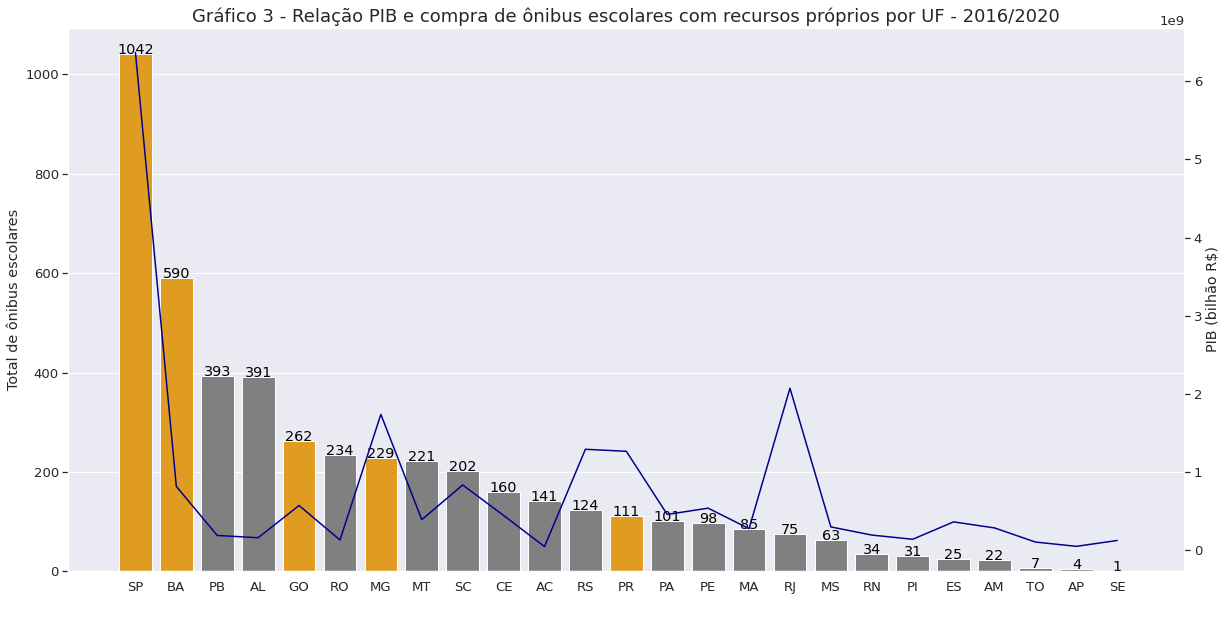

In [ ]:
# Plotando um gráfico de barras e um gráfico de linha simultaneamente.
# O gráfico de barras representando a quantidade de veículos adquiridos com recursos próprios por UF no período analisado, e o gráfico de linha correspondendo ao PIB por UF.
# Neste caso, manteve-se o mesmo destaque nas barras do Gráfico 2, correspondente às UF que mais adquiriram ônibus escolares no período, independentemente da forma de pagamento.

fig, ax1 = plt.subplots(figsize=(20,10))
clrs = ['orange' if x in ['SP', 'MG', 'BA', 'GO', 'PR'] else 'grey' for x in df_sigarp_rec_prop_uf_qtde_pib['UF']]
g = sns.barplot(data = df_sigarp_rec_prop_uf_qtde_pib, x='UF', y='Qtde.', ax=ax1, palette=clrs)
ax2 = ax1.twinx()
ax2.grid(False)
ax1.set(xlabel=' ', ylabel='Total de ônibus escolares')
ax2.set(ylabel='PIB (bilhão R$)')
plt.title('Gráfico 3 - Relação PIB e compra de ônibus escolares com recursos próprios por UF - 2016/2020', fontsize=18)
sns.lineplot(data = df_sigarp_rec_prop_uf_qtde_pib['PIB'], ax=ax2, color='darkblue')

for index, row in df_sigarp_rec_prop_uf_qtde_pib.iterrows():
    g.text(row.name,row['Qtde.'], round(row['Qtde.'],2), color='black', ha="center")

### Hipótese 3: as vendas de ônibus escolares para o Programa Caminho da Escola representam fatia consistente e significativa do mercado de ônibus no período investigado.

In [ ]:
# Inicialmente, é preciso somar/agrupar a coluna "Qtde." do dataframe SIGARP pela coluna "ano_compra", com o objetivo de obter o total de veículos vendidos por ano:
df_sigarp_fornecedor_valor = df_sigarp['Qtde.'].groupby(df_sigarp['ano_compra']).sum().reset_index(level='ano_compra')

# Alterando o nome da coluna "Qtde.", para "Total de ônibus escolares", para não confundir com a futura informação do total de ônibus vendidos no país:
df_sigarp_fornecedor_valor.rename(columns={"Qtde.": "Total de ônibus escolares"},inplace=True)

# Agregando ao dataframe a coluna "Total de ônibus", com a informação do total de ônibus vendidos no país entre 2016 e 2020;
# OBS: dados obtidos no site da Federação Nacional da Distribuição de Veículos Automotores - FENABRAVE: http://www.fenabrave.org.br/Portal/conteudo/conteudo/anuarios
df_sigarp_fornecedor_valor['Total de ônibus'] = pd.Series([13924, 15357, 19572, 27193, 18219])

# Agregando ao dataframe a coluna "Participacao escolar", com o percentual de ônibus escolares vendidos por ano em relação ao total de ônibus:
df_sigarp_fornecedor_valor['Participacao escolar'] = df_sigarp_fornecedor_valor['Total de ônibus escolares'] / df_sigarp_fornecedor_valor['Total de ônibus'] * 100
df_sigarp_fornecedor_valor

,ano_compra,Total de ônibus escolares,Total de ônibus,Participacao escolar
0,2016,1048,13924,7.53
1,2017,1596,15357,10.39
2,2018,2334,19572,11.93
3,2019,3168,27193,11.65
4,2020,5640,18219,30.96


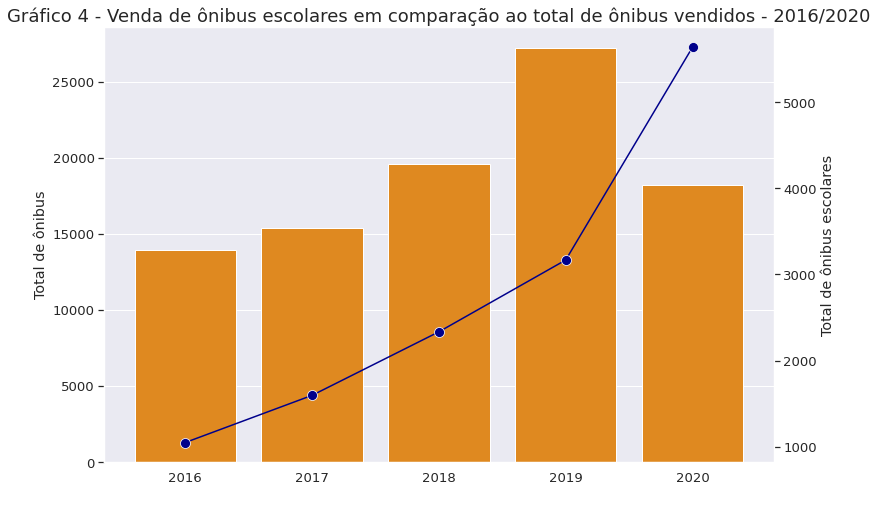

In [ ]:
# Plotando um gráfico de barras e um gráfico de linha simultaneamente.
# O gráfico de barras representando a quantidade total de ônibus vendidos no período, e o gráfico de linha correspondendo à quantidade de ônibus escolares:

fig, ax1 = plt.subplots(figsize=(12,8))
sns.barplot(data = df_sigarp_fornecedor_valor, x='ano_compra', y='Total de ônibus', ax=ax1, color="darkorange")
ax2 = ax1.twinx()
ax2.grid(False)
ax1.set(xlabel=' ')
plt.title('Gráfico 4 - Venda de ônibus escolares em comparação ao total de ônibus vendidos - 2016/2020',fontsize=18)
sns.lineplot(data = df_sigarp_fornecedor_valor['Total de ônibus escolares'], ax=ax2, color='darkblue', marker='o', markersize=10)

### Hipótese 4: a participação das empresas fornecedoras no mercado de ônibus no Brasil se reflete nas vendas para o Programa Caminho da Escola.

In [19]:
# Inicialmente, é necessário realizar dois ajustes no dataframe SIGARP, relativamente aos dados da coluna "Fornecedor":
# 1. Encurtar o nome da empresa MAN LATIN AMERICA, para facilitar a visualização do gráfico;
# 2. Alterando os dados da empresa SAN MARINO para MARCOPOLO, uma vez que aquela pertence a esta; a MARCOPOLO SA decidiu participar do Pregão FNDE nº 11/2019 com o CNPJ da SAN MARINO, porém se trata da mesma empresa:
df_sigarp['Fornecedor'] = df_sigarp['Fornecedor'].replace({'MAN LATIN AMERICA INDUSTRIA E COMERCIO DE VEICULOS LTDA': 'MAN LATIN AMERICA LTDA', 'SAN MARINO ONIBUS LTDA': 'MARCOPOLO SA'})

# Em seguida, é preciso somar/agrupar a coluna "Qtde." do dataframe SIGARP pela coluna "Fornecedor", com o objetivo de obter o total de veículos vendidos por cada um dos fornecedores do Programa Caminho da Escola no período analisado:
df_sigarp_fornecedor_qtde = df_sigarp['Qtde.'].groupby([df_sigarp['Fornecedor']]).sum().reset_index(level='Fornecedor')

# Alterando o nome da coluna "Qtde.", para "Total de ônibus escolares", para não confundir com a futura informação do total de ônibus vendidos por esses mesmos fornecedores no mercado nacional:
df_sigarp_fornecedor_qtde.rename(columns={"Qtde.": "Total de ônibus escolares"},inplace=True)

# Agregando ao dataframe a coluna "Total de ônibus", com a informação do total de ônibus vendidos por cada um desses fornecedores no país entre 2016 e 2020;
# OBS: dados obtidos no site da Federação Nacional da Distribuição de Veículos Automotores - FENABRAVE: http://www.fenabrave.org.br/Portal/conteudo/conteudo/anuarios
df_sigarp_fornecedor_qtde['Total de ônibus'] = pd.Series([1059, 4400, 17190, 9310, 55729])

# Agregando ao dataframe a coluna "Outros ônibus", correspondente à subtração do total de ônibus escolares do total de ônibus vendidos:
df_sigarp_fornecedor_qtde['Outros ônibus'] = df_sigarp_fornecedor_qtde['Total de ônibus'] - df_sigarp_fornecedor_qtde['Total de ônibus escolares']

# Agregando ao dataframe a coluna "Participacao escolar", com o percentual de ônibus escolares vendidos por cada um dos fornecedores em relação ao total de ônibus por eles vendidos no período analisado:
df_sigarp_fornecedor_qtde['Participacao escolar'] = round((df_sigarp_fornecedor_qtde['Total de ônibus escolares'] / df_sigarp_fornecedor_qtde['Total de ônibus'] * 100), 2)

# Ordenando o dataframe por ordem decrescente em relação ao total de ônibus vendidos por cada um dos fornecedores no período analisado:
df_sigarp_fornecedor_qtde = df_sigarp_fornecedor_qtde.sort_values('Total de ônibus', ascending=False)
df_sigarp_fornecedor_qtde

,Fornecedor,Total de ônibus escolares,Total de ônibus,Outros ônibus,Participacao escolar
4,MERCEDES-BENZ DO BRASIL LTDA,2574,55729,53155,4.62
2,MAN LATIN AMERICA LTDA,7073,17190,10117,41.15
3,MARCOPOLO SA,1998,9310,7312,21.46
1,CNH INDUSTRIAL DO BRASIL LTDA,2042,4400,2358,46.41
0,AGRALE SA,99,1059,960,9.35


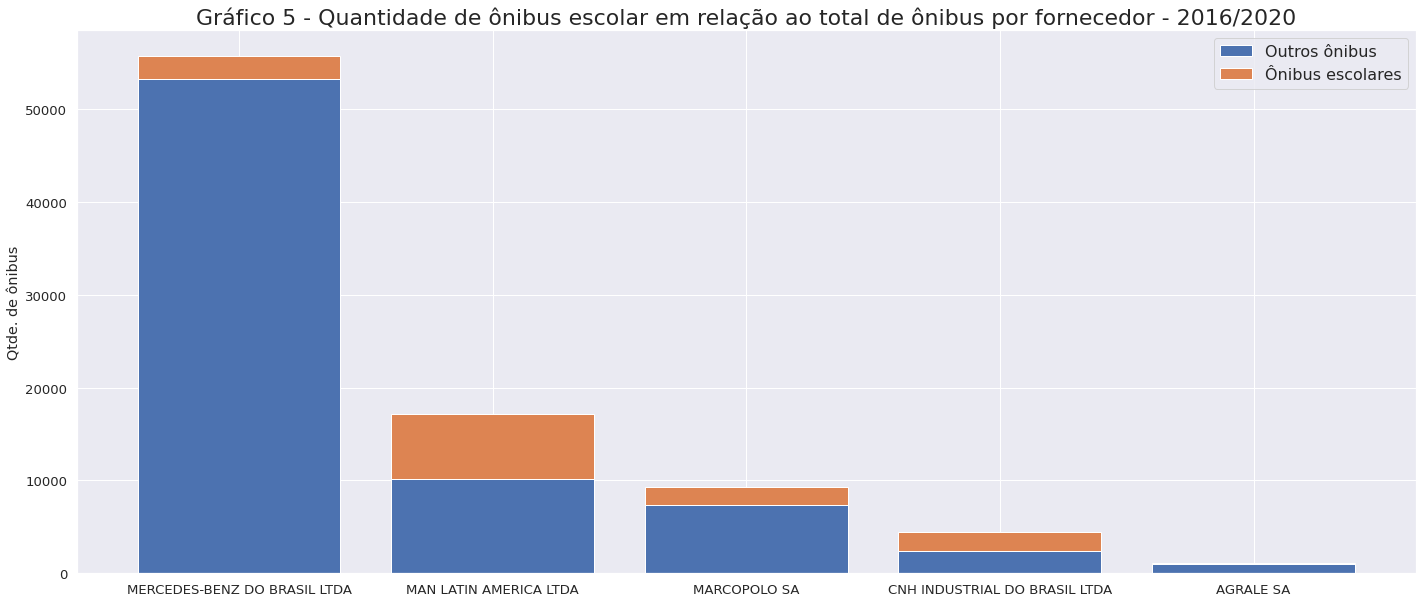

<Figure size 3600x3600 with 0 Axes>

In [22]:
# Plotando um gráfico de barras empilhadas com o objetivo de mostrar a participação de venda dos ônibus escolares em relação ao total de ônibus vendidos por cada fornecedor no período analisado.
fig, ax = plt.subplots(figsize=(24,10))

plt.figure(figsize=(50,50))
ax1 = ax.bar(df_sigarp_fornecedor_qtde['Fornecedor'], df_sigarp_fornecedor_qtde['Outros ônibus'], label='Outros ônibus')
ax2 = ax.bar(df_sigarp_fornecedor_qtde['Fornecedor'], df_sigarp_fornecedor_qtde['Total de ônibus escolares'], bottom=df_sigarp_fornecedor_qtde['Outros ônibus'],
       label='Ônibus escolares')

ax.set_ylabel('Qtde. de ônibus')
ax.set_title('Gráfico 5 - Quantidade de ônibus escolar em relação ao total de ônibus por fornecedor - 2016/2020', fontsize=22)
ax.legend(fontsize=16, loc="best")

plt.show()

### Conclusões e Achados

#### **Hipótese 1**: existe uma maior tendência de aquisição de ônibus escolares com recursos transferidos pelo FNDE que com recursos próprios dos entes federados.

**Não foi possível, com a investigação realizada, tirar conclusões inequívocas em relação a essa hipótese**. Em geral, o Gráfico 1 mostra uma distribuição razoavelmente homogênea entre a densidade de probabilidade estimada para aquisições com recursos próprios dos entes federados e para aquisições com recursos transferidos pelo FNDE às entidades subnacionais. Ainda assim, pequenos detalhes chamam a atenção:


*   Ao longo do período analisado, houve uma tendência de maior probabilidade de compra com recursos transferidos pelo FNDE para os ônibus com valor entre R\$ 150 mil e R\$ 200 mil. 
*   A partir de 2018, houve uma nítida maior probabilidade de aquisição com recursos transferidos pelo FNDE dos veículos de maior valor (entre R\$ 250 mil e R\$ 300 mil em 2018 e 2019 e acima de R\$ 350 mil em 2020).
*   A mediana do valor dos veículos adquiridos subiu nitidamente de 2016 para 2017, mantendo-se estável até 2019, com leve diminuição em 2020.



#### **Hipótese 2**: os estados (UF) que mais adquirem ônibus escolares também são os que mais utilizam recursos próprios como forma de pagamento dos veículos, e os estados (UF) que mais adquirem ônibus escolares com recursos próprios também são os que têm maior Produto Interno Bruto - PIB.

**Hipótese não confirmada**. Embora três dos cinco estados que mais adquiriram ônibus escolares no período analisado (Gráfico 2) também estiveram entre os cinco que mais adquiriram com recursos próprios (SP, BA e GO), observaram-se algumas variações relevantes no posicionamento de alguns estados (Gráfico 3):
*   MG foi o segundo estado que mais adquiriu ônibus escolares no período analisado, porém foi apenas o sétimo dentre os que mais adquiriram com recursos próprios; variação ainda maior em relação ao PR, que foi o quinto maior comprador de ônibus escolares, mas apenas o décimo terceiro quando analisadas apenas as compras com recursos próprios. Curiosamente, esses dois estados possuem o terceiro e o quinto maiores PIB do país, respectivamente.
*   PB e AL, respectivamente sétimo e décimo primeiro dentre os estados que mais adquiriram ônibus escolares no período, foram o terceiro e quarto colocados dentre os que mais compraram os veículos utilizando recursos próprios. Esses estados também estão em posições contíguas na série dos valores de PIB, porém ocupando apenas a décima nona e a vigésima posições, respectivamente.

#### **Hipótese 3**: as vendas de ônibus escolares para o Programa Caminho da Escola representam fatia consistente e significativa do mercado de ônibus no período investigado.

**Hipótese parcialmente confirmada**. Conforme se observa no Gráfico 4 e na Tabela acima do Gráfico, as vendas para o Programa Caminho da Escola cresceram consistentemente em relação ao total de ônibus vendidos entre 2016 e 2019, ainda que o percentual de participação tenha sido relativamente menor em 2016 (7,53%) que nos três anos seguintes (entre 10 e 11%). Ainda assim, com exceção de 2020, em que as vendas de ônibus escolares deram um salto em relação aos anos anteriores, representando mais de 30% do total de ônibus vendidos no país, não é se pode concluir que o Programa Caminho da Escola representa fatia significativa desse mercado, embora esse conceito de representatividade, a priori, seja um tanto quanto subjetivo, necessitando de maior investigação para uma conclusão mais apropriada.

#### **Hipótese 4**: a participação das empresas fornecedoras no mercado de ônibus no Brasil se reflete nas vendas para o Programa Caminho da Escola.

**Hipótese não confirmada**. Conforme se observa no Gráfico 5 e na Tabela acima do Gráfico, há significativas diferenças na participação das empresas no mercado geral de ônibus e na fatia correspondente ao Programa Caminho da Escola: 
* A empresa Mercedes Benz, que é inquestionavelmente a que possui a maior parcela de mercado de ônibus no Brasil, é apenas a segunda maior fornecedora de ônibus escolares para o Programa Caminho da Escola no período analisado. 
* A empresa Man Latin America (Volkswagen), maior fornecedora de ônibus para o Programa Caminho da Escola no período analisado, com total de venda quase três vezes maior que a segunda colocada, Mercedes Benz, é a segunda em relação ao total de ônibus, com apenas um terço, aproximadamente, do total fornecido pela Mercedes Benz. Consequentemente, o Programa Caminho da Escola é muito mais significativo para o total de vendas da Man Latin America (41%) que para a Mercedes Benz (5%).
* Embora tenham volume de vendas similar para o Programa Caminho da Escola, as empresas CNH Industrial (Iveco) e Marcopolo possuem fatias significativamente diferentes do mercado total de ônibus no Brasil, com esta vendendo mais que o dobro daquela. Como resultado, o Caminho da Escola se torna muito mais relevante para o total de vendas de ônibus da CNH Industrial (46%) que para a Marcopolo (21%).
* Dentre todos os fornecedores analisados, a Agrale é a que possui a menor presença no mercado total de ônibus e no Programa Caminho da Escola. Ainda assim, a participação da empresa no Programa, em relação ao total de veículos por ela vendidos (9%), é superior à da Mercedes Benz (5%).

Oportunamente, em complementação à análise feita emrelação à Hipótese 3, observa-se que, para as empresas CNH Industrial (46%) e Man Latin America (41%) as vendas para o Programa Caminho da Escola representam fatia significativa da parcela do mercado de ônibus detida por essas empresas no período investigado.